# Expectation Based Scan Statistic

In [1]:
from SpatialScan.region import *
from SpatialScan.scan import *
from SpatialScan.likelihood import *
from SpatialScan.results import *
from SpatialScan.timeseries import *
import pandas as pd

## Time Series Analysis

First start with data from SCOOT query. For example, here we have SCOOt data from 5th May 2020 - 5th June 2020 in the Acton Area of London.

In [6]:
scoot_df = pd.read_csv("../data/ActonMay4.csv")
scoot_df.drop("Unnamed: 0", axis=1, inplace=True)
scoot_df = convert_dates(scoot_df)

In [7]:
scoot_df

,detector_id,lon,lat,measurement_start_utc,measurement_end_utc,n_vehicles_in_interval
0,N24/012a1,-0.288008,51.481486,2020-05-05 00:00:00,2020-05-05 01:00:00,35
1,N24/012a1,-0.288008,51.481486,2020-05-05 01:00:00,2020-05-05 02:00:00,31
2,N24/012a1,-0.288008,51.481486,2020-05-05 02:00:00,2020-05-05 03:00:00,35
3,N24/012a1,-0.288008,51.481486,2020-05-05 03:00:00,2020-05-05 04:00:00,26
4,N24/012a1,-0.288008,51.481486,2020-05-05 04:00:00,2020-05-05 05:00:00,90
...,...,...,...,...,...,...
132749,N27/299a1,-0.308928,51.512572,2020-06-04 19:00:00,2020-06-04 20:00:00,450
132750,N27/299a1,-0.308928,51.512572,2020-06-04 20:00:00,2020-06-04 21:00:00,329
132751,N27/299a1,-0.308928,51.512572,2020-06-04 21:00:00,2020-06-04 22:00:00,263
132752,N27/299a1,-0.308928,51.512572,2020-06-04 22:00:00,2020-06-04 23:00:00,183


From this, we can directly call a time series model. We have some parameters to choose here based on the TSA used. e.g. "HW", "MALD", "LSTM"

In [8]:
forecast_df = count_baseline(df=scoot_df, days_in_past=28, days_in_future=1, method="HW")

In [9]:
forecast_df

,detector_id,lon,lat,measurement_start_utc,measurement_end_utc,baseline,count
0,N24/012a1,-0.288008,51.481486,2020-06-04 00:00:00,2020-06-04 01:00:00,73.854438,53.0
1,N24/012a1,-0.288008,51.481486,2020-06-04 01:00:00,2020-06-04 02:00:00,37.287294,38.0
2,N24/012a1,-0.288008,51.481486,2020-06-04 02:00:00,2020-06-04 03:00:00,31.774988,34.0
3,N24/012a1,-0.288008,51.481486,2020-06-04 03:00:00,2020-06-04 04:00:00,43.542459,43.0
4,N24/012a1,-0.288008,51.481486,2020-06-04 04:00:00,2020-06-04 05:00:00,107.126767,117.0
...,...,...,...,...,...,...,...
4315,N27/299a1,-0.308928,51.512572,2020-06-04 19:00:00,2020-06-04 20:00:00,414.951541,450.0
4316,N27/299a1,-0.308928,51.512572,2020-06-04 20:00:00,2020-06-04 21:00:00,330.917129,329.0
4317,N27/299a1,-0.308928,51.512572,2020-06-04 21:00:00,2020-06-04 22:00:00,288.648683,263.0
4318,N27/299a1,-0.308928,51.512572,2020-06-04 22:00:00,2020-06-04 23:00:00,221.771609,183.0


Output from TSA

## The Scan

Data Checks as a first step - baselines non-negative and dates to datetime.

In [10]:
forecast_df = cleanse_forecast_data(forecast_df)
forecast_df

Dates in datetime format. Moving to next stage.

118 NaN values found in 'count' column. Dropping these from the dataframe.
0 NaN values found in 'baseline' column. Dropping these from the dataframe.

21 negative baseline values found. Setting these to zero.

Data cleansing complete. 118 rows removed from dataframe.


,detector_id,lon,lat,measurement_start_utc,measurement_end_utc,baseline,count
0,N24/012a1,-0.288008,51.481486,2020-06-04 00:00:00,2020-06-04 01:00:00,73.854438,53.0
1,N24/012a1,-0.288008,51.481486,2020-06-04 01:00:00,2020-06-04 02:00:00,37.287294,38.0
2,N24/012a1,-0.288008,51.481486,2020-06-04 02:00:00,2020-06-04 03:00:00,31.774988,34.0
3,N24/012a1,-0.288008,51.481486,2020-06-04 03:00:00,2020-06-04 04:00:00,43.542459,43.0
4,N24/012a1,-0.288008,51.481486,2020-06-04 04:00:00,2020-06-04 05:00:00,107.126767,117.0
...,...,...,...,...,...,...,...
4315,N27/299a1,-0.308928,51.512572,2020-06-04 19:00:00,2020-06-04 20:00:00,414.951541,450.0
4316,N27/299a1,-0.308928,51.512572,2020-06-04 20:00:00,2020-06-04 21:00:00,330.917129,329.0
4317,N27/299a1,-0.308928,51.512572,2020-06-04 21:00:00,2020-06-04 22:00:00,288.648683,263.0
4318,N27/299a1,-0.308928,51.512572,2020-06-04 22:00:00,2020-06-04 23:00:00,221.771609,183.0


### `plot_global_region()`

First choose a date to look at activity.

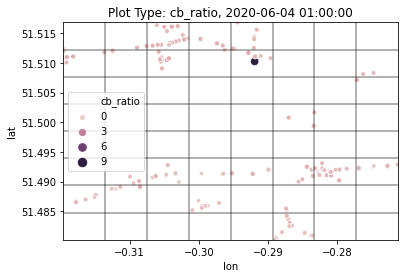

In [12]:
plot_global_region(forecast_df, time_slice=None, overlay_grid=True, grid_partition=8, plot_type='cb_ratio')

Then, we can run the model ...

### `EBP()`

In [13]:
res_df = EBP(forecast_df, 8)

Aggregating data from detector level to grid level.
Beginning Scan. Setup Time: 3.83 seconds
100.00% complete.
16224 space-time regions searched in 40.87 seconds
Total run time: 44.70 seconds


In [14]:
res_df

,x_min,x_max,y_min,y_max,t_min,t_max,B_in,C_in,B_out,C_out,...,l_score_000,p_value_000,l_score_025,p_value_025,l_score_050,p_value_050,l_score_075,p_value_075,l_score_100,p_value_100
2493,-0.295405,-0.283323,51.507672,51.512251,2020-06-04,2020-06-04 04:00:00,0.002581,0.007576,1.210243,1.204072,...,0.003179,NaN,0.002133,NaN,0.001395,NaN,0.000871,NaN,0.000503,NaN
2459,-0.295405,-0.289364,51.493936,51.512251,2020-06-04,2020-06-04 04:00:00,0.002581,0.007576,1.210243,1.204072,...,0.003179,NaN,0.002133,NaN,0.001395,NaN,0.000871,NaN,0.000503,NaN
2462,-0.295405,-0.289364,51.498515,51.512251,2020-06-04,2020-06-04 04:00:00,0.002581,0.007576,1.210243,1.204072,...,0.003179,NaN,0.002133,NaN,0.001395,NaN,0.000871,NaN,0.000503,NaN
2465,-0.295405,-0.289364,51.503094,51.512251,2020-06-04,2020-06-04 04:00:00,0.002581,0.007576,1.210243,1.204072,...,0.003179,NaN,0.002133,NaN,0.001395,NaN,0.000871,NaN,0.000503,NaN
2467,-0.295405,-0.289364,51.507672,51.512251,2020-06-04,2020-06-04 04:00:00,0.002581,0.007576,1.210243,1.204072,...,0.003179,NaN,0.002133,NaN,0.001395,NaN,0.000871,NaN,0.000503,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5397,-0.277282,-0.271241,51.493936,51.512251,2020-06-04,2020-06-04 08:00:00,0.004819,0.004562,1.208004,1.207086,...,-0.000007,NaN,-0.000192,NaN,-0.000562,NaN,-0.001059,NaN,-0.001649,NaN
5398,-0.277282,-0.271241,51.498515,51.503094,2020-06-04,2020-06-04 08:00:00,0.000000,0.000000,1.212823,1.211648,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5400,-0.277282,-0.271241,51.498515,51.512251,2020-06-04,2020-06-04 08:00:00,0.004819,0.004562,1.208004,1.207086,...,-0.000007,NaN,-0.000192,NaN,-0.000562,NaN,-0.001059,NaN,-0.001649,NaN
5401,-0.277282,-0.271241,51.498515,51.516830,2020-06-04,2020-06-04 08:00:00,0.004819,0.004562,1.208004,1.207086,...,-0.000007,NaN,-0.000192,NaN,-0.000562,NaN,-0.001059,NaN,-0.001649,NaN


Once we have `res_df`, we can do many things...

### `plot_region_by_rank()` - See which regions of space are getting the highest F(S) scores

Switch between `plot_types`

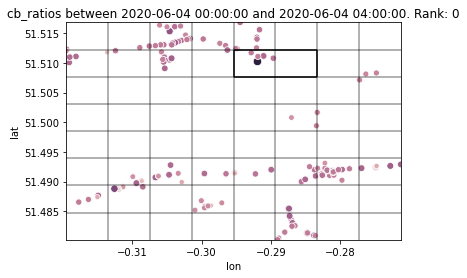

In [15]:
plot_region_by_rank(0, res_df, forecast_df, plot_type='cb_ratio')

Now suppose I was interested in this highest ranked region and want to look at its time series... Switch the plot type between "count", "baseline" and "cb_ratio".

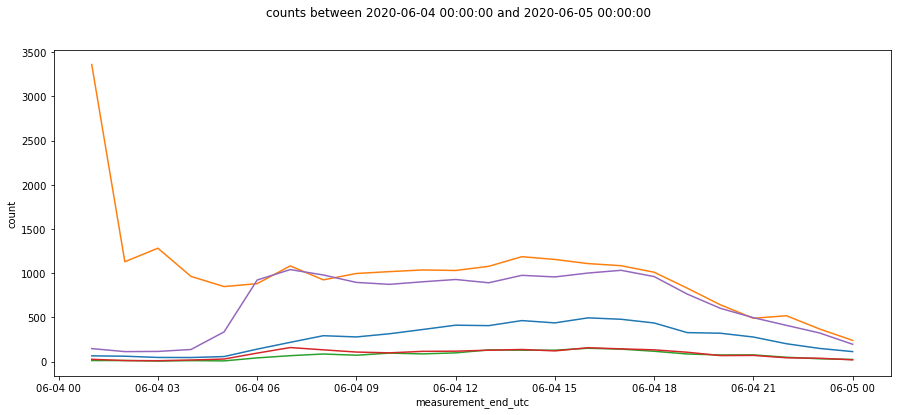

In [16]:
# First create a region object
region = make_region_from_res(res_df, rank=0, whole_prediction_period=True)

plot_region_time_series(region, forecast_df, plot_type="count")

This highest scoring region contains 5 detectors  - this is what they do over the whole period.

#### Average Likelihood Visualisation

For each of our `grid_partition` x `grid_parition` cells, we can calculate it's average likelihood accumulated form the overlapping search rectangles. 

In [ ]:
# First call this function to get all plot information
scores, x, y, t, av_l_max = average_likelihood(res_df)

Now, we can plot using `visualise_results()`

In [ ]:
visualise_results(scores, x, y, t, av_l_max, smooth=False)

## Randomisation Testing

Now we have the result, how significant are they?

`randomisation_test()`

In [ ]:
sig_df, f_scores = randomisation_test(forecast_df, res_df, n_sims=10)

Let's see how our scores from `res_df` compare with randomly generated ones. The `sig_df` dataframe has now populated the `p_value` columns of `res_df`.

In [ ]:
sig_df

We can now report on all regions with `p_value` less than some threshold i.e. 0.01

In [ ]:
sig_df[sig_df["p_value"] < 0.01]

Here, 2266 (most probably overlapping regions) are returned as signifiant space-time clusters

In [ ]:
plot_region_by_rank(50, sig_df, forecast_df, plot_type='cb_ratio')

The first 50 or so all related to our large anomaly.